# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

<font color='red'> Reading the csv file </font>

In [1]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [2]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [3]:
import numpy as np

unq_usrs = data["user_id"].unique()
unq_movies = data["item_id"].unique()
print(unq_usrs.shape)
print(unq_movies.shape)

(943,)
(1662,)


In [4]:
from scipy.sparse import csr_matrix

temp = data.groupby(["user_id","item_id"], as_index=False).agg({"user_id":lambda x: x,"item_id": lambda x: x,'rating': lambda x: x})
temp["new"] = temp[temp.columns[0:]].apply(lambda x: list(x),axis=1)
row_idx = np.array(temp["new"].to_list())[:,0]
col_idx = np.array(temp["new"].to_list())[:,1]
rat_val = np.array(temp["new"].to_list())[:,2]
# taking max function in shape
# because sometimes some ids may not be present at all which creates error while forming array
adjacency_matrix = csr_matrix((rat_val,(row_idx,col_idx)),shape=(unq_usrs.max()+1,unq_movies.max()+1)).toarray()
adjacency_matrix

array([[5, 0, 4, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]])

In [5]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [6]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [7]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [8]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape) # singular values for each component
print(VT.T.shape)

(943, 5)
(5,)
(1681, 5)


<font color='red'>Compute mean of ratings</font>

In [9]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    return ratings.mean()

In [10]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [11]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [12]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    temp = np.zeros(dim)    
    return temp

In [13]:
dim= adjacency_matrix.shape[0]# give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [14]:
dim= adjacency_matrix.shape[1]# give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [15]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [16]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/db_i'''
    # As U matrix is nothing but user matrix -> representing each row with a user vector
    # As V matrix is nothing but movie matrix -> representing each column with a movie vector after transposing matrix
    temp = (-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id])))+(alpha*2*b_i[user_id])
    return temp


<font color='cyan'>Grader function -4 </font>

In [17]:
def grader_db(value):
    print(np.round(value,3))
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

-0.931


True

<font color='red'>Compute dL/dc_j</font>

In [18]:
def derivative_dc(user_id,item_id,rating,U,V,mu,alpha):
    '''In this function, we will compute dL/dc_j'''
    temp = (-2*(rating-mu-b_i[user_id]-c_j[item_id]-np.dot(U[user_id],V.T[item_id])))+(alpha*2*c_j[item_id])
    return temp


<font color='cyan'>Grader function - 5 </font>

In [19]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu,r)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [20]:
epochs = 50
reg_alpha = 0.01
lr = 0.01
mse = []
for i in range(1,epochs+1):
    y_pred = []
    fin=0
    ## Here we can think of prev SGD assignment problem as,
    ## see the derivative on which paramter its depending and use the same to minimize in every epoch
    for j,k in zip(list(data["user_id"]),list(data["item_id"])):
        b_i[j] = b_i[j] - lr * (derivative_db(j,k,adjacency_matrix[j,k],U,VT,mu,reg_alpha))
        c_j[k] = c_j[k] - lr * (derivative_dc(j,k,adjacency_matrix[j,k],U,VT,mu,reg_alpha))
    for user,item in zip(list(data["user_id"]),list(data["item_id"])):
        temp = mu+b_i[user]+c_j[item]+np.dot(U[user],VT.T[item])
        y_pred.append(temp)
    for act,pred in zip(list(data["rating"]),y_pred):
        fin += ((act-pred)**2)
    fin *= (1/len(data))
    mse.append(fin)
    print("Epoch number:",i,"MSE:",fin)

Epoch number: 1 MSE: 0.8893876391331805
Epoch number: 2 MSE: 0.8628191541211193
Epoch number: 3 MSE: 0.8532036768144573
Epoch number: 4 MSE: 0.8485959137198061
Epoch number: 5 MSE: 0.8460123440523762
Epoch number: 6 MSE: 0.8443980968365719
Epoch number: 7 MSE: 0.8433049549275796
Epoch number: 8 MSE: 0.8425176786724577
Epoch number: 9 MSE: 0.8419230519987068
Epoch number: 10 MSE: 0.8414570141493193
Epoch number: 11 MSE: 0.8410810305431075
Epoch number: 12 MSE: 0.8407706729689796
Epoch number: 13 MSE: 0.8405097378512845
Epoch number: 14 MSE: 0.8402870483089917
Epoch number: 15 MSE: 0.8400946307764746
Epoch number: 16 MSE: 0.8399266302333116
Epoch number: 17 MSE: 0.8397786396298373
Epoch number: 18 MSE: 0.8396472707276319
Epoch number: 19 MSE: 0.8395298706947212
Epoch number: 20 MSE: 0.8394243295853093
Epoch number: 21 MSE: 0.8393289461902497
Epoch number: 22 MSE: 0.8392423324046236
Epoch number: 23 MSE: 0.8391633436471407
Epoch number: 24 MSE: 0.8390910273019598
Epoch number: 25 MSE: 0.8

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

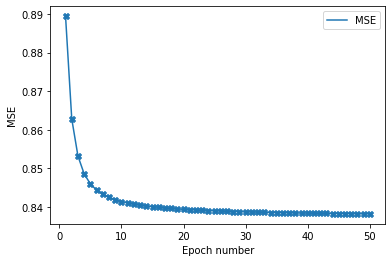

In [21]:
import matplotlib.pyplot as plt

e = list(range(1,epochs+1))
plt.plot(e,mse,label="MSE")
plt.legend()
plt.scatter(e,mse,label="MSE",marker="X")
plt.xlabel("Epoch number")
plt.ylabel("MSE")
plt.show()

<br>

<font color='red'> Task 2</font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

In [22]:
df_temp = pd.read_csv("user_info.csv")

In [23]:
df = pd.DataFrame(U)
df["y"] = df_temp["is_male"]
df

,0,1,2,3,4,y
0,0.066226,0.007889,-0.012532,-0.086136,0.024856,1
1,0.013644,-0.048895,0.056554,0.015761,-0.012028,0
2,0.005438,-0.025128,0.020028,0.032832,0.035080,1
3,0.005704,-0.018211,0.010899,0.021857,0.013915,1
4,0.034122,0.009004,-0.044053,-0.016093,0.004330,0
...,...,...,...,...,...,...
938,0.010350,-0.038006,0.006501,-0.014001,-0.051227,0
939,0.031624,-0.007730,0.032983,0.013827,0.023613,1
940,0.007389,-0.025974,0.006343,-0.017043,-0.007389,1
941,0.024999,0.004478,0.026056,0.077359,-0.000760,0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

lr = LogisticRegression()
x_tr = np.array(df.iloc[:,0:5])
y_tr = np.array(df["y"])
lr.fit(x_tr,y_tr)

LogisticRegression()

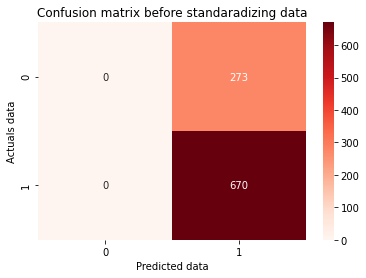

In [25]:
import seaborn as sns
y_pred = lr.predict(x_tr)
cm=confusion_matrix(y_tr,y_pred) # Before standardisation
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds")
plt.title("Confusion matrix before standaradizing data")
plt.ylabel("Actuals data")
plt.xlabel("Predicted data")
plt.show()

### Standard Scaler implementation

In [26]:
sc = StandardScaler()
x_tr_transformed = sc.fit_transform(x_tr)
lr.fit(x_tr_transformed,y_tr)

LogisticRegression()

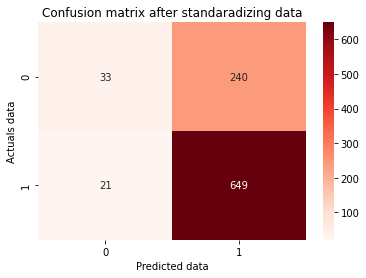

In [27]:
y_pred = lr.predict(x_tr_transformed)
cm = confusion_matrix(y_tr,y_pred)
# From tool tip of sklearn docs, we can see which row and column resembles the TP,TN,FP,FN data
sns.heatmap(cm,annot=True,fmt="d",cmap="Reds")
plt.title("Confusion matrix after standaradizing data")
plt.ylabel("Actuals data")
plt.xlabel("Predicted data")
plt.show()

**Observations:**<br>
*1.Yes, we can bearly predict the gender with the user features got from the U vector*<br>
*2.But before standardising the data, the model seems to be dumb and gives entire output as positive*<br>
*3.After standardizing the data, model improved slightly as TN and TP values contribute to nearly 80% of actual data and model seems to be working good*<br>
*4.As we have not split User data into train and test data, just proceeded for model building, we can also think data might be overfit slightly but so far the model is doing better from the results shown*